In [1]:
#imports
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import math
import pickle
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
#soccer plots radar plot
from soccerplots.radar_chart import Radar

from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("df_defenders.csv")

In [3]:
#df already clean
df

,Player,Pos,Squad,Age,90s,TklW,Tkl%,Blocks,Int,Tkl+Int,...,Long Cmp%,Passes into final third,Prog,SCA,Recov,Aerial Won,Aerial Won%,Touches Def 3rd,Touches Mid 3rd,Rec
0,Rodrigo Abascal,DF,Boavista,28-359,7.5,1.33,52.9,1.20,1.87,3.73,...,43.9,3.47,2.80,1.60,6.80,0.93,50.0,33.3,33.3,45.3
1,Pedro Álvaro,DF,Estoril,22-312,10.9,0.37,71.4,1.38,1.10,1.74,...,65.0,2.02,2.20,0.55,3.94,2.20,68.6,39.4,22.8,43.1
2,Pedro Amaral,DF,Rio Ave,25-136,11.0,0.82,57.1,0.91,0.91,2.45,...,52.9,3.82,3.64,2.00,4.55,0.18,22.2,20.1,30.9,43.2
3,André Amaro,DF,Vitória,20-130,13.2,0.98,59.1,1.29,1.82,3.48,...,71.3,2.88,2.27,0.76,4.92,2.20,63.0,25.8,26.9,33.5
4,Léo Andrade,DF,Marítimo,24-265,11.8,0.68,78.6,1.69,2.20,3.39,...,56.3,1.61,1.44,0.76,4.58,1.78,56.8,30.1,21.2,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Bernardo Vital,DF,Estoril,22-010,11.0,0.45,77.8,0.64,0.45,1.45,...,74.8,1.64,1.27,0.27,4.27,1.73,59.4,45.7,18.4,43.2
85,Steven Vitória,DF,Chaves,35-362,13.0,0.54,81.8,1.77,1.38,2.23,...,61.3,0.92,1.77,0.69,3.31,2.31,68.2,34.0,21.5,38.5
86,Wendell,DF,Porto,29-172,7.0,1.14,58.3,0.86,1.14,3.57,...,38.5,2.00,1.57,1.00,5.57,1.14,66.7,21.0,31.3,37.4
87,Bruno Wilson,DF,Vizela,26-012,10.4,0.48,83.3,1.63,1.25,2.12,...,43.3,1.83,1.15,0.87,4.71,3.85,61.5,30.7,17.6,26.2


/home/big/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/big/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE - Outfield players')

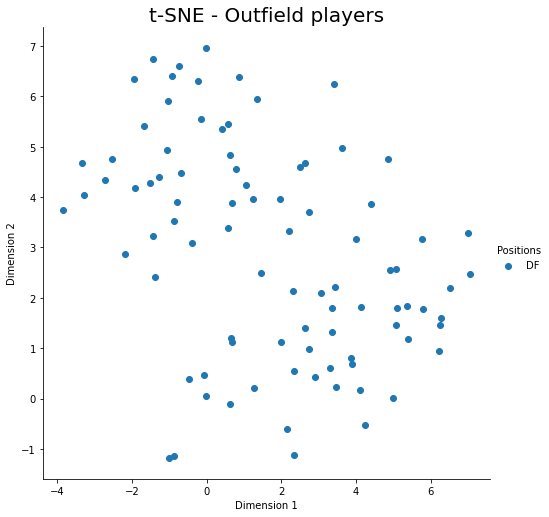

In [4]:
#t-sne for a quick clustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# selecting only numerical metrics
stats = df.iloc[:, 4:]
# position types
labels = df['Pos']

# standardizing the data
data = StandardScaler().fit_transform(stats)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", size=7)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - Outfield players', size=20)

Text(0.5, 1.0, 'PCA: components selection')

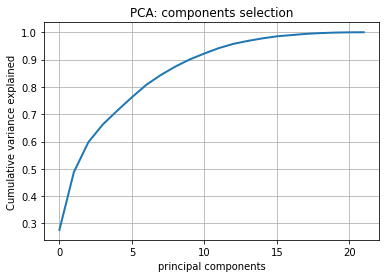

In [5]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# standardizing the data
data = StandardScaler().fit_transform(stats)

# setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 22
pca_data = pca.fit_transform(data)

# % variance explained per components
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

# cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')

In [6]:
df

,Player,Pos,Squad,Age,90s,TklW,Tkl%,Blocks,Int,Tkl+Int,...,Long Cmp%,Passes into final third,Prog,SCA,Recov,Aerial Won,Aerial Won%,Touches Def 3rd,Touches Mid 3rd,Rec
0,Rodrigo Abascal,DF,Boavista,28-359,7.5,1.33,52.9,1.20,1.87,3.73,...,43.9,3.47,2.80,1.60,6.80,0.93,50.0,33.3,33.3,45.3
1,Pedro Álvaro,DF,Estoril,22-312,10.9,0.37,71.4,1.38,1.10,1.74,...,65.0,2.02,2.20,0.55,3.94,2.20,68.6,39.4,22.8,43.1
2,Pedro Amaral,DF,Rio Ave,25-136,11.0,0.82,57.1,0.91,0.91,2.45,...,52.9,3.82,3.64,2.00,4.55,0.18,22.2,20.1,30.9,43.2
3,André Amaro,DF,Vitória,20-130,13.2,0.98,59.1,1.29,1.82,3.48,...,71.3,2.88,2.27,0.76,4.92,2.20,63.0,25.8,26.9,33.5
4,Léo Andrade,DF,Marítimo,24-265,11.8,0.68,78.6,1.69,2.20,3.39,...,56.3,1.61,1.44,0.76,4.58,1.78,56.8,30.1,21.2,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Bernardo Vital,DF,Estoril,22-010,11.0,0.45,77.8,0.64,0.45,1.45,...,74.8,1.64,1.27,0.27,4.27,1.73,59.4,45.7,18.4,43.2
85,Steven Vitória,DF,Chaves,35-362,13.0,0.54,81.8,1.77,1.38,2.23,...,61.3,0.92,1.77,0.69,3.31,2.31,68.2,34.0,21.5,38.5
86,Wendell,DF,Porto,29-172,7.0,1.14,58.3,0.86,1.14,3.57,...,38.5,2.00,1.57,1.00,5.57,1.14,66.7,21.0,31.3,37.4
87,Bruno Wilson,DF,Vizela,26-012,10.4,0.48,83.3,1.63,1.25,2.12,...,43.3,1.83,1.15,0.87,4.71,3.85,61.5,30.7,17.6,26.2


In [7]:
players = []
for idx in range(len(df)):
    players.append(df['Player'][idx]+ '({})'.format(df['Squad'][idx]))

In [8]:
player_ID = dict(zip(players, np.arange(len(players))))

In [9]:
def getStats(name):
    idx = player_ID[name]
    return stats[idx, :]


In [10]:
idx = player_ID['Rodrigo Abascal(Boavista)']

In [11]:
stats.iloc[0,:]

90s                         7.50
TklW                        1.33
Tkl%                       52.90
Blocks                      1.20
Int                         1.87
Tkl+Int                     3.73
Clr                         4.13
Err                         0.00
Total Cmp                  48.50
Total Cmp%                 78.80
Short Cmp                  14.80
Long Cmp                    5.73
Long Cmp%                  43.90
Passes into final third     3.47
Prog                        2.80
SCA                         1.60
Recov                       6.80
Aerial Won                  0.93
Aerial Won%                50.00
Touches Def 3rd            33.30
Touches Mid 3rd            33.30
Rec                        45.30
Name: 0, dtype: float64

In [13]:
#Using Cosine Similarity

from scipy.spatial import distance
import numpy as np
from tqdm.notebook import tqdm

# fetch the player vector
def getStats(name):
    idx = player_ID[name]
    return stats.iloc[idx, :]

# fetch cosine similarity between two player vectors
def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

# normalize an array to a scale of 0 to 100
def normalize(array):
    return np.array([round(num, 2) for num in (array - min(array))*100/(max(array)-min(array))])

# player-similarities hash table
engine = {}
for query in tqdm(players):
    metric = []
    for player in players:
        value = similarity(query, player)
        metric.append(value)
    metric = normalize(metric)
    # adding normalized similarity values to the 'player name' key
    engine[query] = metric

# saving hash table/dict as a pickle
with open(r'data\engine.pickle', 'wb') as file:
    pickle.dump(engine, file)

  0%|          | 0/89 [00:00<?, ?it/s]

In [15]:
engine

{'Rodrigo Abascal(Boavista)': array([100.  ,  85.64,  77.93,  77.07,  72.8 ,  84.46,  95.04,  88.61,
         72.76,  62.18,  69.62,  94.54,  91.77,  90.45,  94.94,  58.88,
         93.43,  81.54,  82.38,  85.53,  81.26,  81.02,  89.59,  94.46,
         87.99,  79.23,  66.54,  86.07,   0.  ,  84.56,  81.28,  47.4 ,
         76.23,  57.12,  58.24,  80.12,  78.27,  25.29,  53.34,  81.53,
         35.58,  75.8 ,  94.53,  70.48,  89.01,  83.74,  81.8 ,  84.62,
         84.55,  83.96,  90.31,  82.38,  71.83,  94.92,  97.05,  79.63,
         71.52,  67.45,  88.42,  82.47,  58.95,  88.5 ,  76.74,  91.88,
         54.71,  93.27,  77.99,  66.25,  82.38,  77.89,  67.5 ,  58.06,
         96.83,  63.11,  77.  ,  86.56,  42.5 ,  91.5 ,  94.8 ,  44.8 ,
         86.95,  76.88,  71.56,  54.03,  78.04,  77.53,  85.33,  55.64,
         94.54]),
 'Pedro Álvaro(Estoril)': array([ 86.58, 100.  ,  64.96,  92.71,  92.52,  75.34,  80.49,  71.4 ,
         93.95,  89.56,  85.6 ,  83.98,  92.89,  97.65,  82.09, 

In [24]:
df['Age'] = df['Age'].str[:2]
df['Age'] = pd.to_numeric(df['Age'])



In [25]:
with open('data_rs.pkl', 'wb') as f:
    # Write the data to the file
    pickle.dump(df, f)

In [26]:
with open(r'data\player_ID.pickle', 'wb') as file:
    pickle.dump(player_ID, file)

In [22]:
df

,Player,Pos,Squad,Age,90s,TklW,Tkl%,Blocks,Int,Tkl+Int,...,Long Cmp%,Passes into final third,Prog,SCA,Recov,Aerial Won,Aerial Won%,Touches Def 3rd,Touches Mid 3rd,Rec
0,Rodrigo Abascal,DF,Boavista,28-359,7.5,1.33,52.9,1.20,1.87,3.73,...,43.9,3.47,2.80,1.60,6.80,0.93,50.0,33.3,33.3,45.3
1,Pedro Álvaro,DF,Estoril,22-312,10.9,0.37,71.4,1.38,1.10,1.74,...,65.0,2.02,2.20,0.55,3.94,2.20,68.6,39.4,22.8,43.1
2,Pedro Amaral,DF,Rio Ave,25-136,11.0,0.82,57.1,0.91,0.91,2.45,...,52.9,3.82,3.64,2.00,4.55,0.18,22.2,20.1,30.9,43.2
3,André Amaro,DF,Vitória,20-130,13.2,0.98,59.1,1.29,1.82,3.48,...,71.3,2.88,2.27,0.76,4.92,2.20,63.0,25.8,26.9,33.5
4,Léo Andrade,DF,Marítimo,24-265,11.8,0.68,78.6,1.69,2.20,3.39,...,56.3,1.61,1.44,0.76,4.58,1.78,56.8,30.1,21.2,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Bernardo Vital,DF,Estoril,22-010,11.0,0.45,77.8,0.64,0.45,1.45,...,74.8,1.64,1.27,0.27,4.27,1.73,59.4,45.7,18.4,43.2
85,Steven Vitória,DF,Chaves,35-362,13.0,0.54,81.8,1.77,1.38,2.23,...,61.3,0.92,1.77,0.69,3.31,2.31,68.2,34.0,21.5,38.5
86,Wendell,DF,Porto,29-172,7.0,1.14,58.3,0.86,1.14,3.57,...,38.5,2.00,1.57,1.00,5.57,1.14,66.7,21.0,31.3,37.4
87,Bruno Wilson,DF,Vizela,26-012,10.4,0.48,83.3,1.63,1.25,2.12,...,43.3,1.83,1.15,0.87,4.71,3.85,61.5,30.7,17.6,26.2
